In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [4]:
X_centered.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [38]:
from sklearn.decomposition import PCA

### Your code is here

pca = PCA(n_components=2)

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [39]:
### Your code is here
pca_df = pca.fit_transform(X_centered)   

pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

In [40]:
pca_df = pd.DataFrame(pca_df, columns=['pca_1','pca_2'])

pca_df.head()

,pca_1,pca_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [16]:
fc_corr = X_centered.corrwith(pca_df['pca_1'])
sec_corr = X_centered.corrwith(pca_df['pca_2'])

In [20]:
corr = pd.concat((fc_corr, sec_corr), axis=1)
corr.columns = ['pca_1','pca_2']
corr.head()

,pca_1,pca_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960


<Axes: >

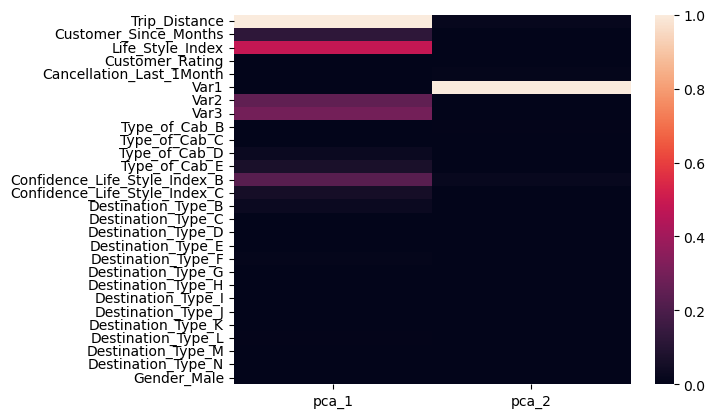

In [23]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index, vmin=0, vmax=1)

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [28]:
### Your code is here

pca_df = np.concatenate((pca_df.values, y.values.reshape(-1,1)), axis=1)

pca_df = pd.DataFrame(pca_df, columns=['pca_1','pca_2','Surge_Pricing_Type'])

In [29]:
pca_df.head()

,pca_1,pca_2,Surge_Pricing_Type
0,-38.743132,-23.282634,2.0
1,-13.209252,-25.023815,2.0
2,-2.004910,-1.637085,2.0
3,17.178458,-0.907657,3.0
4,14.477389,-11.656752,2.0


<Axes: xlabel='pca_1', ylabel='pca_2'>

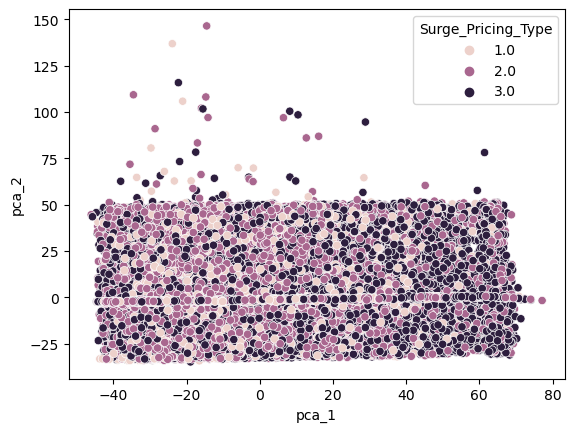

In [30]:
sns.scatterplot(data=pca_df, x='pca_1', y='pca_2', hue='Surge_Pricing_Type')

In [41]:
pca_3d = PCA(n_components=3)

pca_df_3d = pca_3d.fit_transform(X_centered)   

pca_3d.explained_variance_ratio_

array([0.63176117, 0.21129863, 0.13025786])

In [42]:
pca_df_3d = pd.DataFrame(pca_df_3d, columns=['pca_1','pca_2', 'pca_3'])
pca_df_3d.head()

,pca_1,pca_2,pca_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


<Axes: >

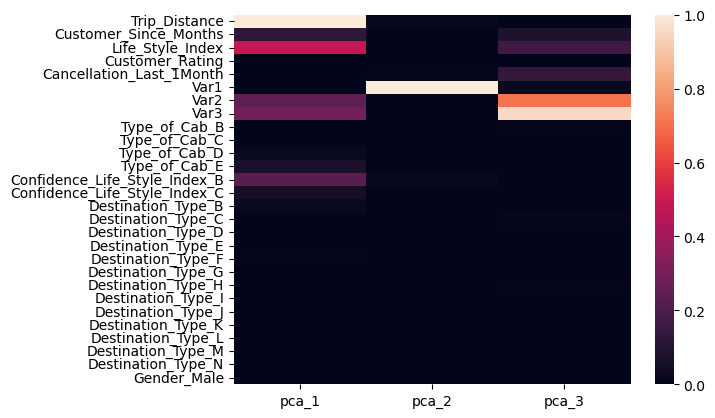

In [47]:
fc_corr_3d = X_centered.corrwith(pca_df_3d['pca_1'])
sec_corr_3d = X_centered.corrwith(pca_df_3d['pca_2'])
thd_corr_3d = X_centered.corrwith(pca_df_3d['pca_3'])

corr_3d = pd.concat((fc_corr_3d, sec_corr_3d, thd_corr_3d), axis=1)
corr_3d.columns = ['pca_1','pca_2','pca_3']
corr_3d.head()

sns.heatmap(corr_3d, xticklabels=corr_3d.columns, yticklabels=corr_3d.index, vmin=0, vmax=1)

In [48]:
pca_df_3d = np.concatenate((pca_df_3d.values, y.values.reshape(-1,1)), axis=1)

pca_df_3d = pd.DataFrame(pca_df_3d, columns=['pca_1','pca_2','pca_3','Surge_Pricing_Type'])

pca_df_3d.head()

,pca_1,pca_2,pca_3,Surge_Pricing_Type
0,-38.743132,-23.282634,-11.303274,2.0
1,-13.209252,-25.023815,5.664106,2.0
2,-2.004910,-1.637085,3.663032,2.0
3,17.178458,-0.907657,-3.191676,3.0
4,14.477389,-11.656752,22.999348,2.0


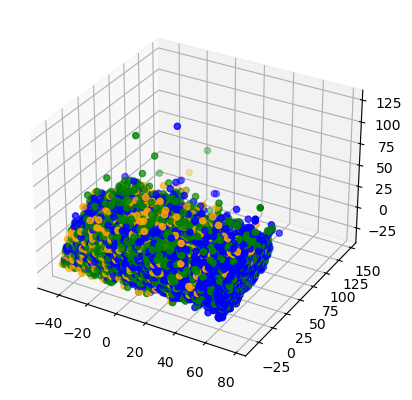

In [53]:
ax = plt.axes(projection='3d')

colors = pca_df_3d['Surge_Pricing_Type'].replace([1,2,3], ['orange', 'green', 'blue'])

ax.scatter3D(pca_df_3d['pca_1'], pca_df_3d['pca_2'], pca_df_3d['pca_3'], c=colors)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [55]:
### Your code is here

pca_df_3d.corr()

,pca_1,pca_2,pca_3,Surge_Pricing_Type
pca_1,1.000000e+00,-2.148991e-17,5.722426e-17,0.131399
pca_2,-2.148991e-17,1.000000e+00,-4.978566e-17,-0.005755
pca_3,5.722426e-17,-4.978566e-17,1.000000e+00,-0.077694
Surge_Pricing_Type,1.313990e-01,-5.754804e-03,-7.769403e-02,1.000000


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [59]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [69]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe = Pipeline([('scaler', StandardScaler()),('model', LogisticRegression())])

search = GridSearchCV(pipe, param_grid)

search.fit(X_train, y_train)
pred = search.predict(X_test)

print(classification_report(y_test, pred, labels=list(y.unique()), digits=3))

              precision    recall  f1-score   support

           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612
           1      0.746     0.532     0.621      5372

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



In [70]:
param_grid_pca = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe_pca = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=2)),('model', LogisticRegression())])

search_pca = GridSearchCV(pipe_pca, param_grid_pca)

search_pca.fit(X_train, y_train)
pred_pca = search_pca.predict(X_test)

print(classification_report(y_test, pred_pca, labels=list(y.unique()), digits=3))

              precision    recall  f1-score   support

           2      0.478     0.690     0.565     11349
           3      0.493     0.511     0.502      9612
           1      0.000     0.000     0.000      5372

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.356     26333
weighted avg      0.386     0.484     0.427     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [71]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [76]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    acc, f1_sc = train_pca_i(n_components, X_train, y_train)   
    accuracy_dict[n_components] = acc
    f1_score_dict[n_components] = f1_sc

CPU times: user 1min 29s, sys: 5.22 s, total: 1min 34s
Wall time: 49.1 s


In [88]:
f1_score_dict

{2: 0.42497725326466956,
 4: 0.47752360624393403,
 8: 0.5236618338876112,
 16: 0.5273516883675151,
 28: 0.6760757307801638}

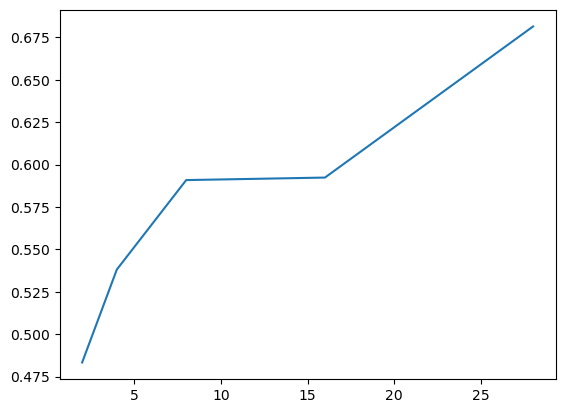

In [86]:
plt.plot(accuracy_dict.keys(), accuracy_dict.values())

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [89]:
from sklearn.manifold import TSNE

### Your code is here

X_tsne = TSNE(n_components=2).fit_transform(X)

X_tsne

array([[-6.0500839e+01, -1.0153520e+02],
       [-6.5051527e+00, -9.3782005e+01],
       [ 4.8393679e+00, -1.8404919e+01],
       ...,
       [-7.4294639e+00, -7.2460718e-02],
       [ 2.2226097e+01, -8.2702789e+01],
       [-4.1015511e+00,  9.8470291e+01]], dtype=float32)

In [90]:
X_tsne = np.concatenate((X_tsne, y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'Surge_Pricing_Type'])

<Axes: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

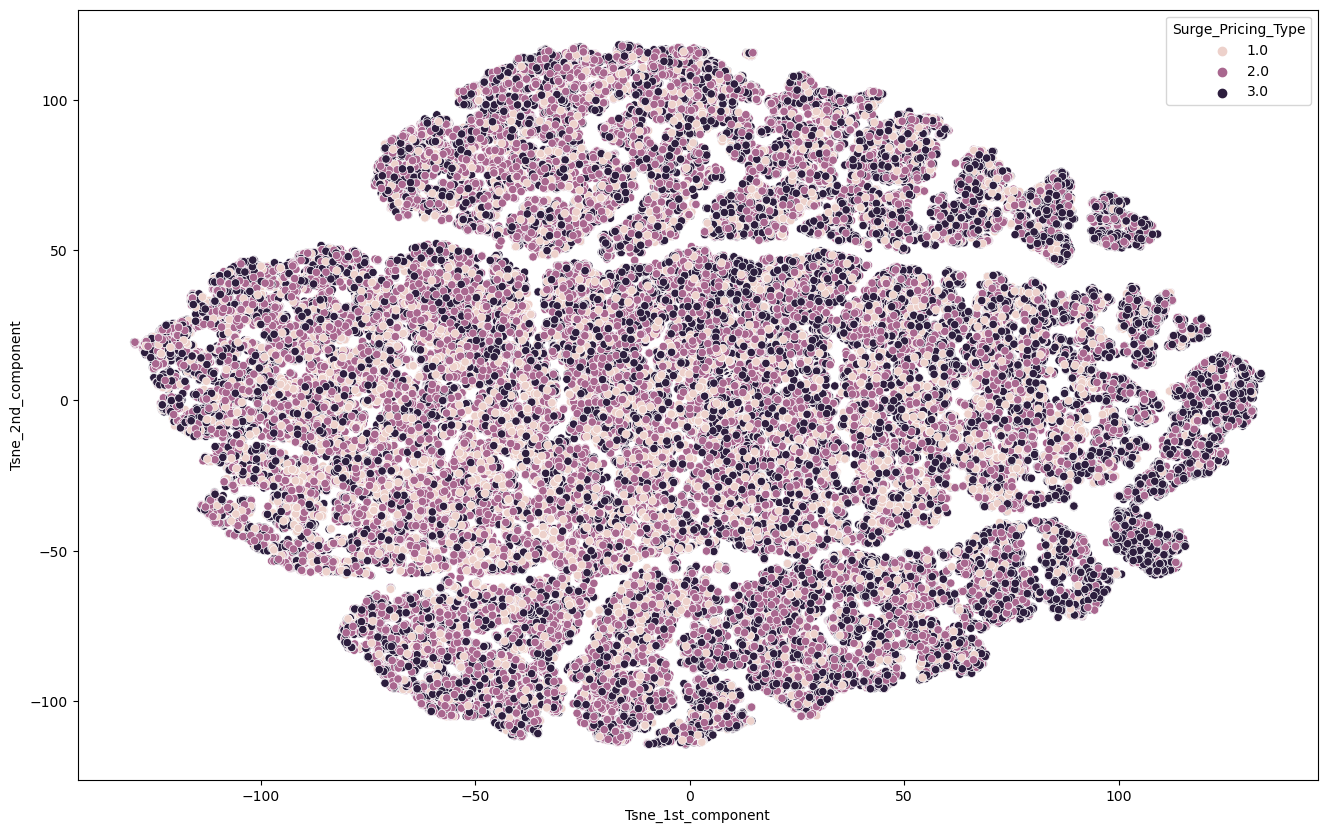

In [91]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="Surge_Pricing_Type")

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [92]:
### Your code is here

X_ts = df.drop("Surge_Pricing_Type", axis=1).head(1000)
y_ts = df["Surge_Pricing_Type"].head(1000)

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!

In [97]:
X_tsne = TSNE(n_components=3).fit_transform(X_ts)

In [98]:
X_tsne = np.concatenate((X_tsne, y_ts.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'Tsne_3nd_component',
                                       'Surge_Pricing_Type'])

<Axes: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

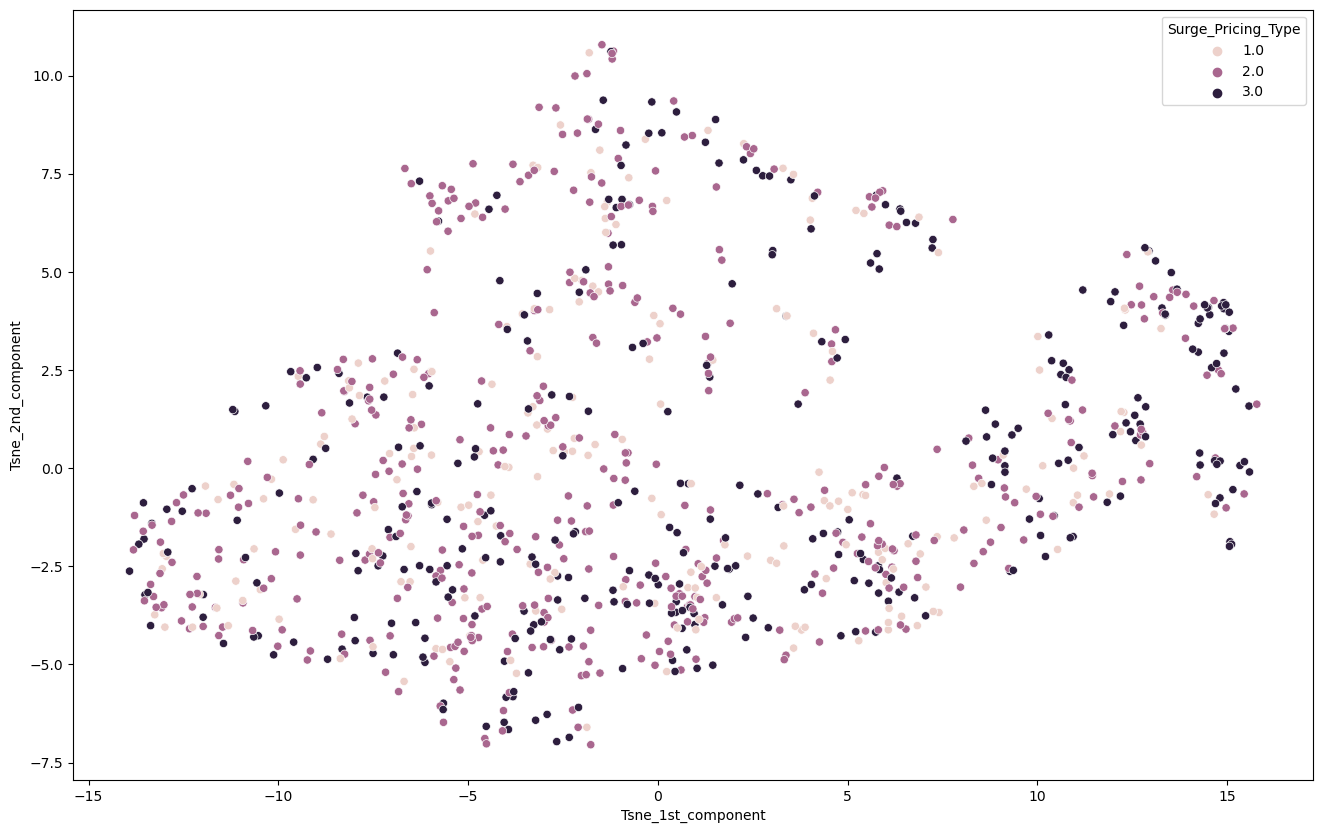

In [99]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="Surge_Pricing_Type")